In [6]:
import wfdb
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
import os
import pandas as pd

In [7]:
name='a104s'
# Especifica el path 
hea_file = 'data/training/'+name
# leer .hea
record = wfdb.rdheader(hea_file)
# accede a los atributos del record
print(record.__dict__)

{'record_name': 'a104s', 'n_sig': 3, 'fs': 250, 'counter_freq': None, 'base_counter': None, 'sig_len': 75000, 'base_time': None, 'base_date': None, 'comments': ['Asystole', 'False alarm'], 'sig_name': ['II', 'V', 'PLETH'], 'p_signal': None, 'd_signal': None, 'e_p_signal': None, 'e_d_signal': None, 'file_name': ['a104s.mat', 'a104s.mat', 'a104s.mat'], 'fmt': ['16', '16', '16'], 'samps_per_frame': [1, 1, 1], 'skew': [None, None, None], 'byte_offset': [24, 24, 24], 'adc_gain': [9902.0, 16280.0, 22520.0], 'baseline': [0, 0, 0], 'units': ['mV', 'mV', 'NU'], 'adc_res': [16, 16, 16], 'adc_zero': [0, 0, 0], 'init_value': [-1326, 13863, 10774], 'checksum': [-16385, -22027, 23018], 'block_size': [0, 0, 0]}



### **Campos del Archivo `.hea`**

- **`record_name`**: `'a103l'`
  - El nombre del registro. Este es el identificador del conjunto de datos o registro de señales.

- **`n_sig`**: `3`
  - Número de señales en el registro. En este caso, hay tres señales.

- **`fs`**: `250`
  - Frecuencia de muestreo en Hz. Significa que las señales están muestreadas a 250 muestras por segundo.

- **`counter_freq`**: `None`
  - Frecuencia del contador, si se usa. No se proporciona en este caso.

- **`base_counter`**: `None`
  - Contador base, si se usa. No se proporciona en este caso.

- **`sig_len`**: `82500`
  - Longitud de la señal en muestras. Esto indica que cada señal tiene 82,500 muestras.

- **`base_time`**: `None`
  - Hora base del registro. No se proporciona en este caso.

- **`base_date`**: `None`
  - Fecha base del registro. No se proporciona en este caso.

- **`comments`**: `['Asystole', 'False alarm']`
  - Comentarios sobre el registro. En este caso, el registro está marcado como 'Asystole' y 'False alarm', indicando que es un evento de asistolia que ha sido clasificado como una alarma falsa.

- **`sig_name`**: `['II', 'V', 'PLETH']`
  - Nombres de las señales. Estas son las señales que se están registrando:
    - `'II'`: Derivación ECG II
    - `'V'`: Una señal adicional, probablemente una derivación de ECG o similar.
    - `'PLETH'`: Fotopletismograma, que mide el volumen de sangre en un punto del cuerpo.

- **`p_signal`**: `None`
  - Señales principales (p_signal). No está disponible en esta instancia, ya que los datos de señales se cargarán desde un archivo `.mat`.

- **`d_signal`**: `None`
  - Señales derivadas (d_signal). No está disponible en esta instancia.

- **`e_p_signal`**: `None`
  - Señales eléctricas (e_p_signal). No está disponible en esta instancia.

- **`e_d_signal`**: `None`
  - Señales derivadas eléctricas (e_d_signal). No está disponible en esta instancia.

- **`file_name`**: `['a103l.mat', 'a103l.mat', 'a103l.mat']`
  - Nombres de los archivos que contienen las señales. Aquí, todos los archivos de datos son `'a103l.mat'`.

- **`fmt`**: `['16', '16', '16']`
  - Formato de los datos en cada archivo. Los datos están en formato de 16 bits.

- **`samps_per_frame`**: `[1, 1, 1]`
  - Número de muestras por fotograma. Aquí cada señal tiene 1 muestra por fotograma.

- **`skew`**: `[None, None, None]`
  - Sesgo de lectura de datos. No está disponible en esta instancia.

- **`byte_offset`**: `[24, 24, 24]`
  - Desplazamiento en bytes para el inicio de cada señal dentro del archivo.

- **`adc_gain`**: `[7247.0, 10520.0, 12530.0]`
  - Ganancia del convertidor analógico-digital (ADC) para cada señal. Esto indica cómo se amplifican las señales antes de ser digitalizadas.

- **`baseline`**: `[0, 0, 0]`
  - Línea base de cada señal. Aquí todas las señales tienen una línea base de 0.

- **`units`**: `['mV', 'mV', 'NU']`
  - Unidades de las señales:
    - `'mV'`: Milivoltios para las señales ECG.
    - `'NU'`: Unidad no especificada para el fotopletismograma (posiblemente una unidad normalizada o sin unidades específicas).

- **`adc_res`**: `[16, 16, 16]`
  - Resolución del ADC en bits para cada señal. Aquí todas las señales tienen una resolución de 16 bits.

- **`adc_zero`**: `[0, 0, 0]`
  - Valor cero del ADC para cada señal. Aquí todos los valores son 0.

- **`init_value`**: `[-171, 9127, 6042]`
  - Valores iniciales en el archivo de datos para cada señal. Estos son los valores de referencia para el procesamiento de las señales.

- **`checksum`**: `[-27403, -301, -17391]`
  - Suma de comprobación de cada señal para verificar la integridad de los datos.

- **`block_size`**: `[0, 0, 0]`
  - Tamaño del bloque de datos para cada señal. Aquí el tamaño del bloque es 0.


In [1]:


# Ruta a la carpeta donde están los archivos .hea
folder_path = 'data/training/'

# Crear una lista para almacenar los datos
data = []

# Recorrer los archivos en la carpeta
for file in os.listdir(folder_path):
    if file.endswith('.hea'):
        #quita el ".hea"
        file=file[:-4]
        # Leer el archivo .hea
        record = wfdb.rdheader(os.path.join(folder_path, file))
        
        # Extraer las características del archivo
        record_name = record.record_name
        n_signals = record.n_sig
        fs = record.fs
        counter_freq = record.counter_freq
        base_counter = record.base_counter
        sig_len = record.sig_len
        base_time = record.base_time
        base_date = record.base_date
        sig_names = record.sig_name
        p_signal = record.p_signal
        d_signal = record.d_signal
        e_p_signal = record.e_p_signal
        e_d_signal = record.e_d_signal
        fmt = record.fmt
        samps_per_frame = record.samps_per_frame
        skew = record.skew
        byte_offset = record.byte_offset
        adc_gain = record.adc_gain
        baseline = record.baseline
        units = record.units
        adc_res = record.adc_res
        adc_zero = record.adc_zero
        init_value = record.init_value
        checksum = record.checksum
        block_size = record.block_size
        comments = record.comments
        
        
        # Añadir los datos a la lista
        data.append([record_name, n_signals, fs, counter_freq, base_counter, sig_len, base_time, base_date, sig_names, p_signal, d_signal, e_p_signal, e_d_signal, fmt, samps_per_frame, skew, byte_offset, adc_gain, baseline, units, adc_res, adc_zero, init_value, checksum, block_size, comments])

# Crear un DataFrame de pandas con las características
df = pd.DataFrame(data, columns=['record_name', 'n_signals', 'fs', 'counter_freq', 'base_counter', 'sig_len', 'base_time', 'base_date', 'sig_names', 'p_signal', 'd_signal', 'e_p_signal', 'e_d_signal', 'fmt', 'samps_per_frame', 'skew', 'byte_offset', 'adc_gain', 'baseline', 'units', 'adc_res', 'adc_zero', 'init_value', 'checksum', 'block_size', 'comments'])

# Mostrar la tabla
df

#exportar la tabla a un archivo csv
df.to_csv('data/exploraciónHea.csv', index=False)



NameError: name 'os' is not defined

dict_keys(['val'])
Forma de los datos en el archivo .mat: (4, 82500)


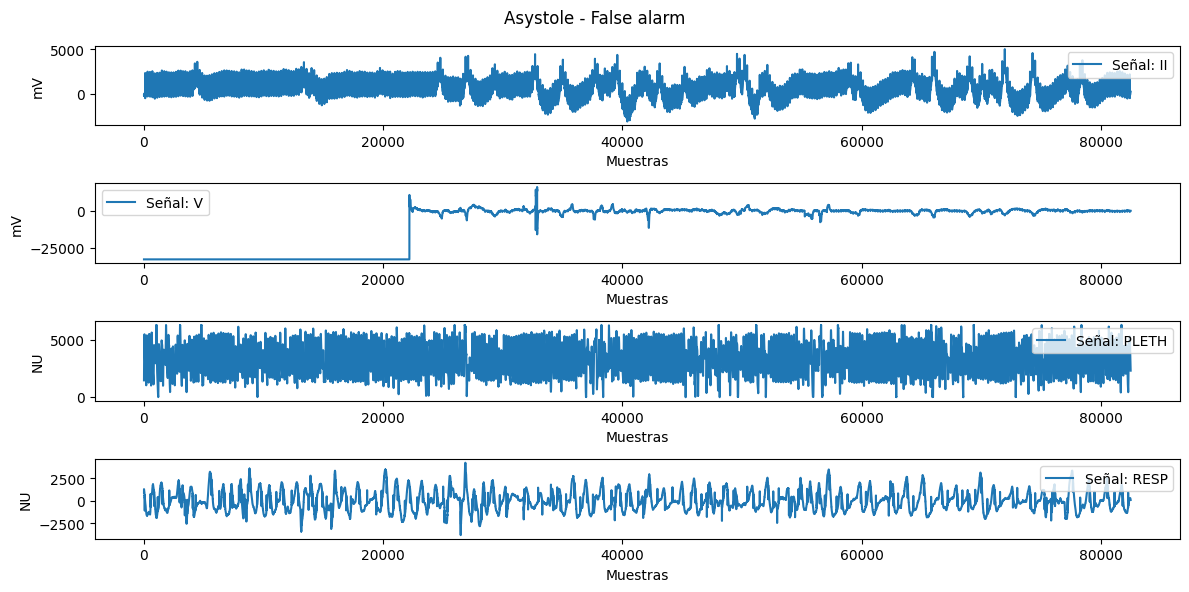

In [19]:
# Prueba de gráfico de una sola señal

# Ruta a tu archivo .hea y .mat (sin la extensión)
record_name = 'data/training/a163l'

# Leer el archivo .hea
record = wfdb.rdheader(record_name)

# Cargar el archivo .mat (contiene las señales)
mat_data = scipy.io.loadmat(f'{record_name}.mat')

# Ver las claves en el archivo .mat para saber cómo acceder a los datos
print(mat_data.keys())

# Asumimos que las señales están bajo la clave 'val' (depende del formato exacto)
signals = mat_data['val']  # Ajusta esto dependiendo del formato exacto del .mat

# Verificar dimensiones de las señales
print("Forma de los datos en el archivo .mat:", signals.shape)

# Graficar las señales
plt.figure(figsize=(12, 6))
for i in range(len(record.sig_name)):
    plt.subplot(len(record.sig_name), 1, i+1)
    plt.plot(signals[i, :], label=f'Señal: {record.sig_name[i]}')
    plt.xlabel('Muestras')
    plt.ylabel(record.units[i])
    plt.legend()

#agregar comentarios
plt.suptitle(record.comments[0] + ' - ' + record.comments[1])

plt.tight_layout()
plt.show()